# Первый подход к данным с буев

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa
import scipy.signal
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', size=14)  

Читаем данные:

In [3]:
data =  pd.read_excel('общаяМ.xls')

data = data.rename(columns={'Unnamed: 0':'date'})

data = data.set_index('date')

Общая статистика по данным:

In [4]:
data.describe()

,T100E,T300E,T500E,S100E,S300E,S500E,T100C,T300C,T500C,S100C,S300C,S500C,T100W,T300W,T500W,S100W,S300W,S500W
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,16.126787,9.344752,6.306586,34.648315,34.254945,34.292490,20.362948,14.378518,7.818492,35.615139,34.975596,34.385426,16.686932,11.898558,8.224708,35.446734,34.950767,34.506987
std,0.368447,0.198377,0.064204,0.055361,0.017650,0.007337,0.429409,0.329767,0.129101,0.061165,0.040092,0.010896,0.500629,0.282065,0.109028,0.048781,0.029558,0.013530
min,15.103289,8.788562,6.166152,34.495760,34.214703,34.273273,19.448261,13.549706,7.576588,35.474197,34.865400,34.364956,15.555008,11.124872,7.961004,35.334255,34.874596,34.477190
25%,15.879441,9.224558,6.267222,34.613161,34.243273,34.288182,20.037606,14.157148,7.739621,35.574673,34.947938,34.376444,16.349646,11.701032,8.160373,35.419283,34.928776,34.497360
50%,16.109983,9.347917,6.297378,34.651882,34.255867,34.292850,20.359660,14.323596,7.796145,35.609188,34.977100,34.386620,16.654385,11.875017,8.222225,35.441628,34.951748,34.506120
75%,16.342365,9.473451,6.335553,34.688025,34.266804,34.297383,20.675125,14.605770,7.878749,35.651808,35.001701,34.393095,17.027031,12.126138,8.283365,35.463110,34.971277,34.515621
max,17.300455,9.792145,6.617201,34.769110,34.321960,34.317204,21.411260,15.464825,8.399680,35.794456,35.088448,34.418070,18.020916,12.531975,8.509391,35.619274,35.015984,34.546276


In [5]:
data.to_csv('bouy.csv')

## Распределения температур по глубинам и регионам:

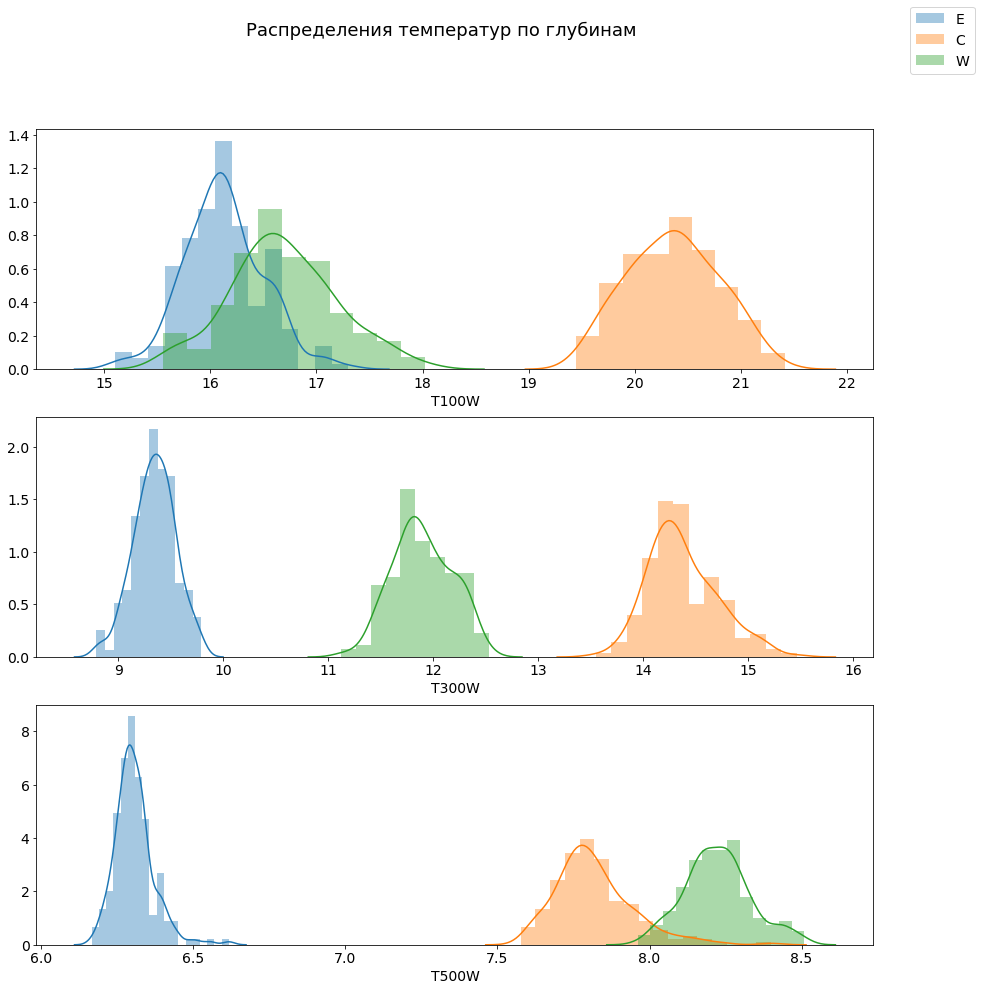

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle('Распределения температур по глубинам', fontsize=18)

sns.distplot(data.T100E,label='E', ax=ax[0])
sns.distplot(data.T100C, label='C', ax=ax[0])
sns.distplot(data.T100W, label='W', ax=ax[0])
fig.legend()
sns.distplot(data.T300E,label='E', ax=ax[1])
sns.distplot(data.T300C, label='C', ax=ax[1])
sns.distplot(data.T300W, label='W', ax=ax[1])
sns.distplot(data.T500E,label='E', ax=ax[2])
sns.distplot(data.T500C, label='C', ax=ax[2])
sns.distplot(data.T500W, label='W', ax=ax[2])


## Распределения солености моря по глубинам и регионам:

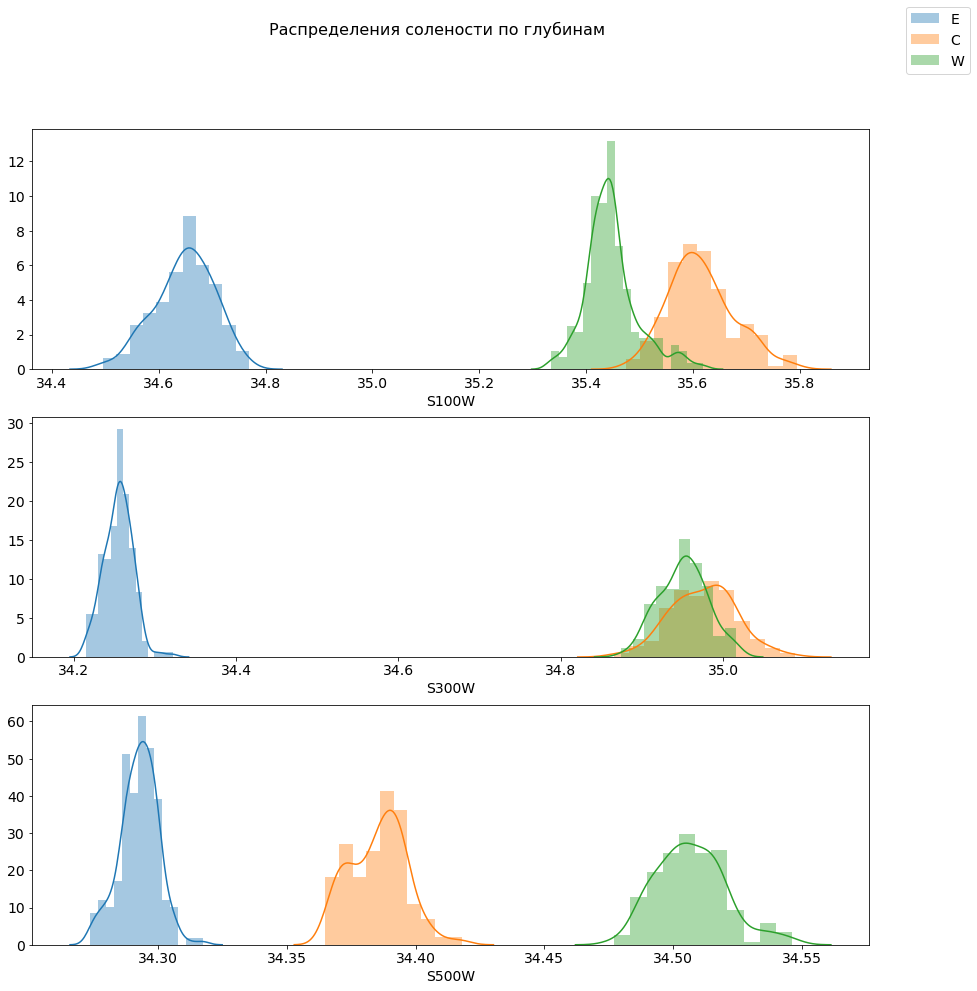

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle('Распределения солености по глубинам', fontsize=16)

sns.distplot(data.S100E,label='E', ax=ax[0])
sns.distplot(data.S100C, label='C', ax=ax[0])
sns.distplot(data.S100W, label='W', ax=ax[0])
fig.legend()
sns.distplot(data.S300E,label='E', ax=ax[1])
sns.distplot(data.S300C, label='C', ax=ax[1])
sns.distplot(data.S300W, label='W', ax=ax[1])
sns.distplot(data.S500E,label='E', ax=ax[2])
sns.distplot(data.S500C, label='C', ax=ax[2])
sns.distplot(data.S500W, label='W', ax=ax[2])



По этим графикам видно, что восточный район довольно сильно отличается от центрального и западного по солености и по изменению температуры с ростом глубины.


-----

## Статистика по временным рядам

In [8]:
import statsmodels.api as sm
sns.set_style('whitegrid')

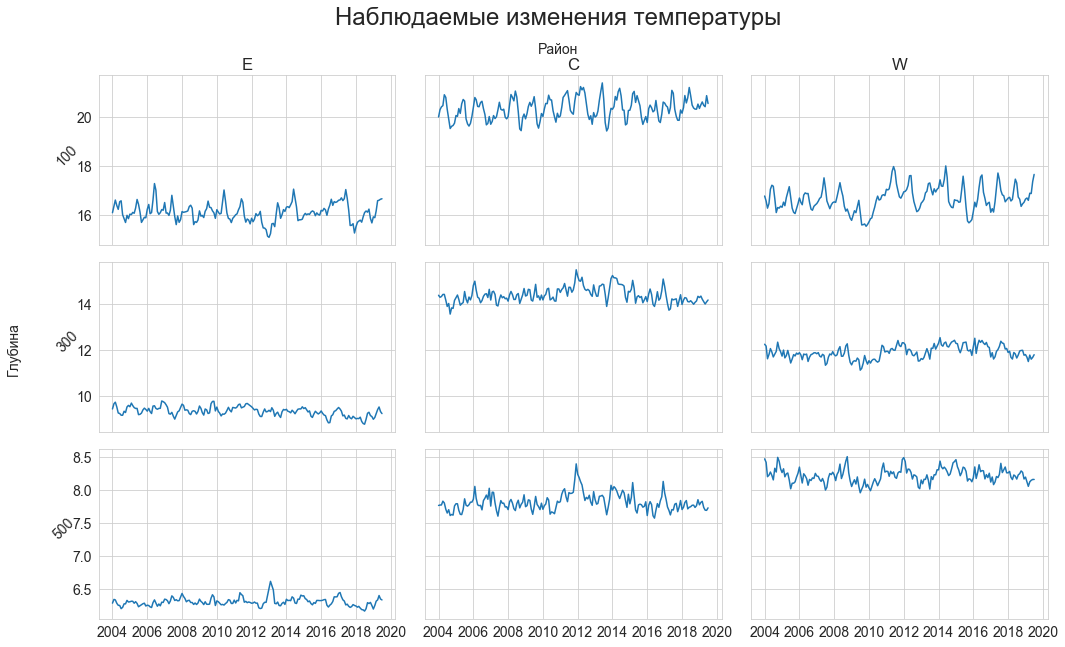

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['T{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.observed.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Наблюдаемые изменения температуры', ha='center', fontsize=24)
plt.show()

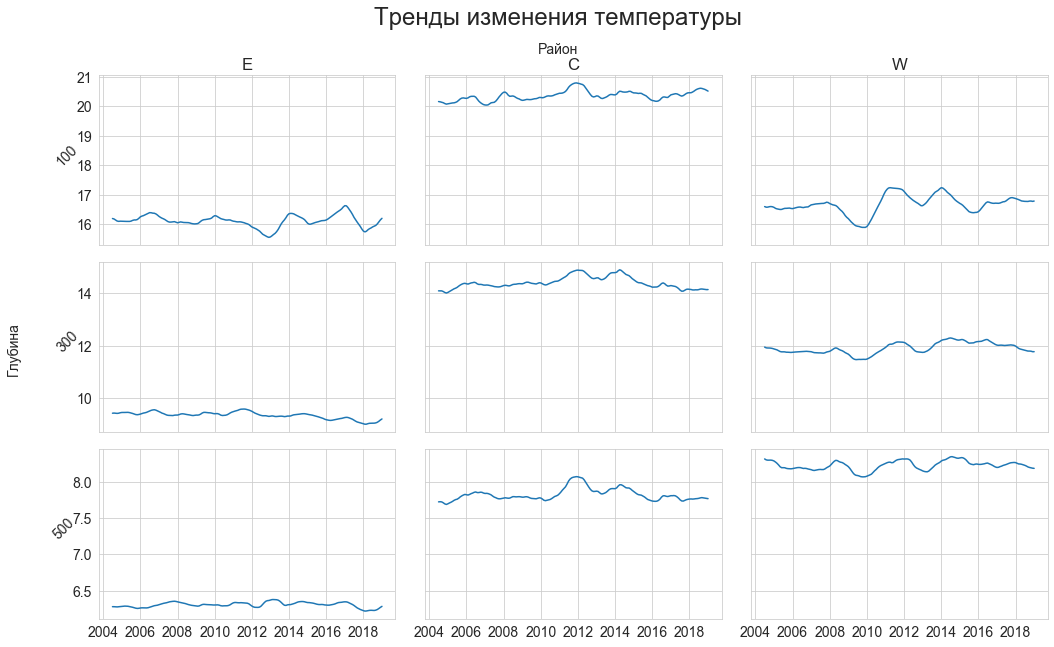

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['T{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.trend.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Тренды изменения температуры', ha='center', fontsize=24)
plt.show()

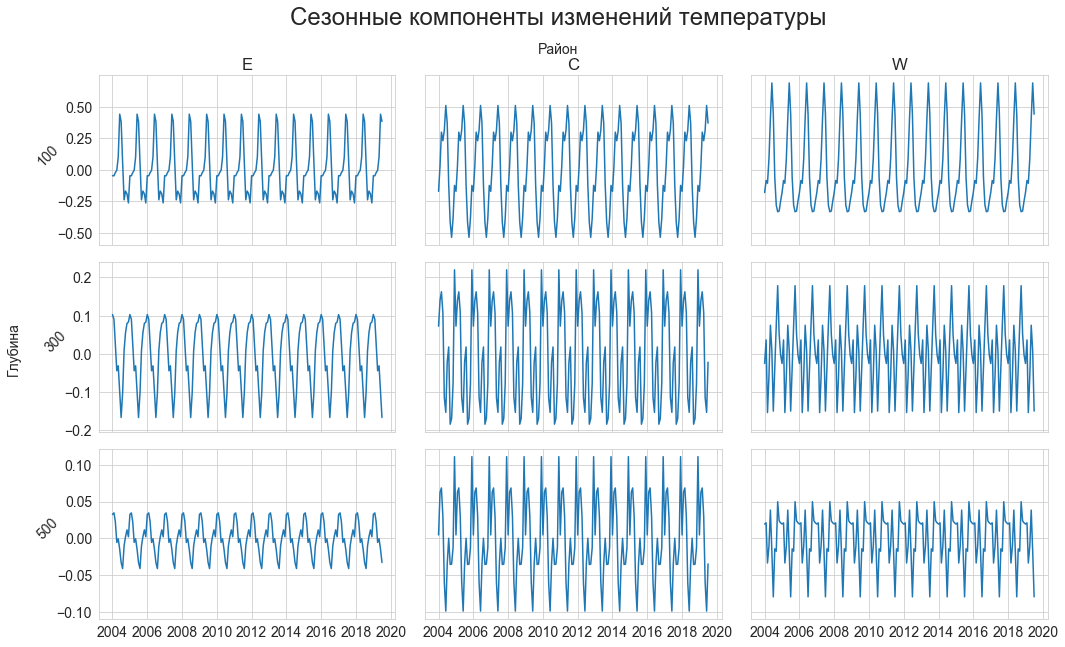

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['T{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.seasonal.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Сезонные компоненты изменений температуры', ha='center', fontsize=24)
plt.show()

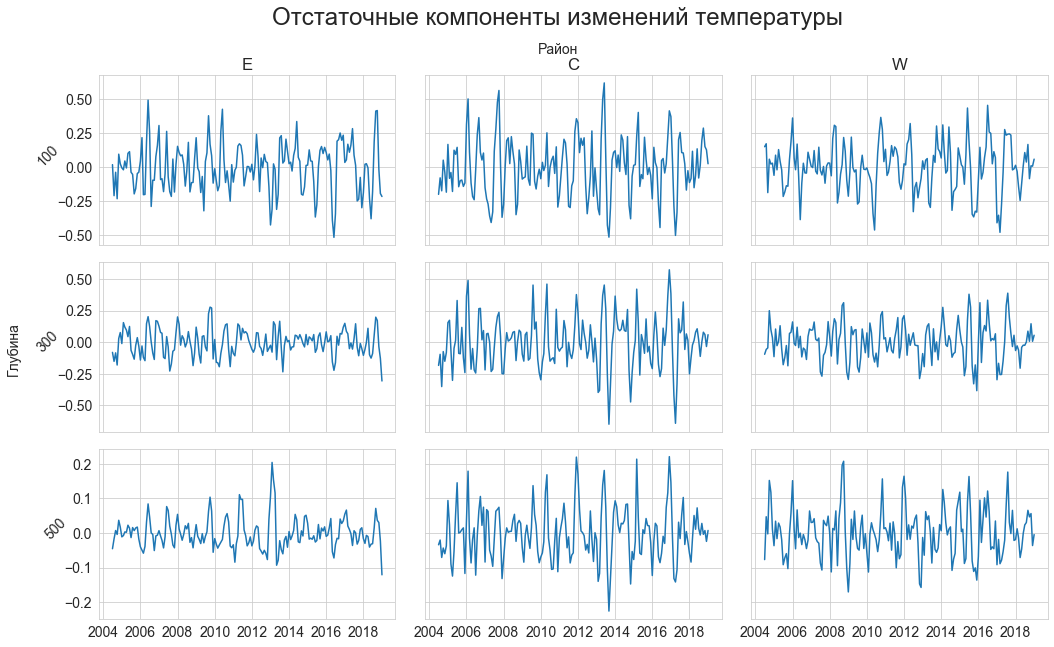

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['T{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.resid.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Отстаточные компоненты изменений температуры', ha='center', fontsize=24)
plt.show()

--------------

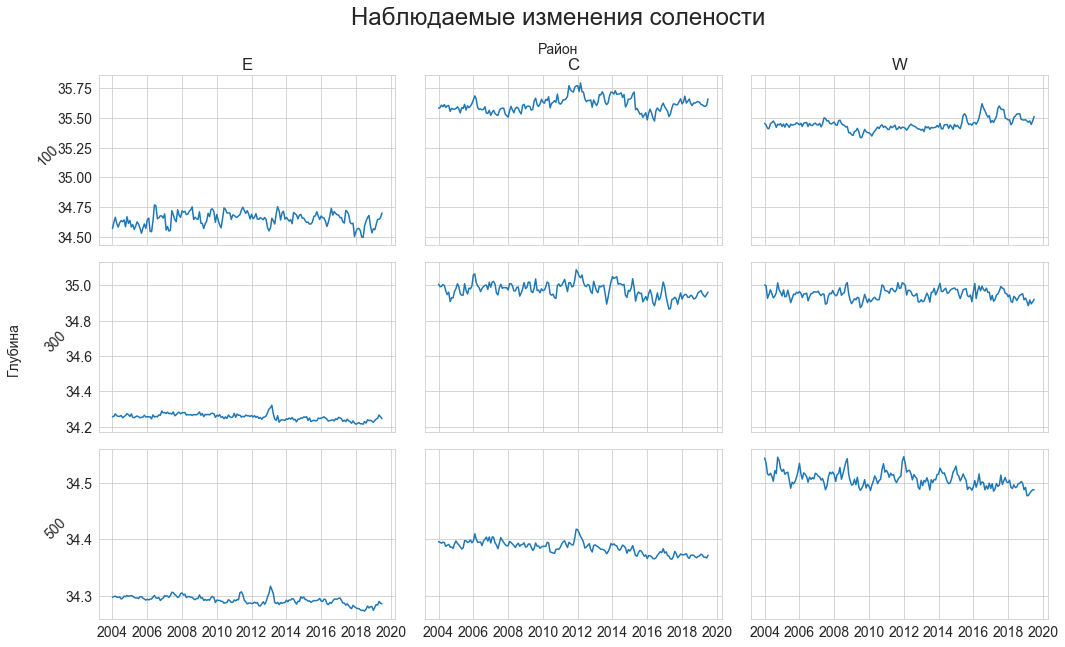

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['S{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.observed.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Наблюдаемые изменения солености', ha='center', fontsize=24)
plt.show()

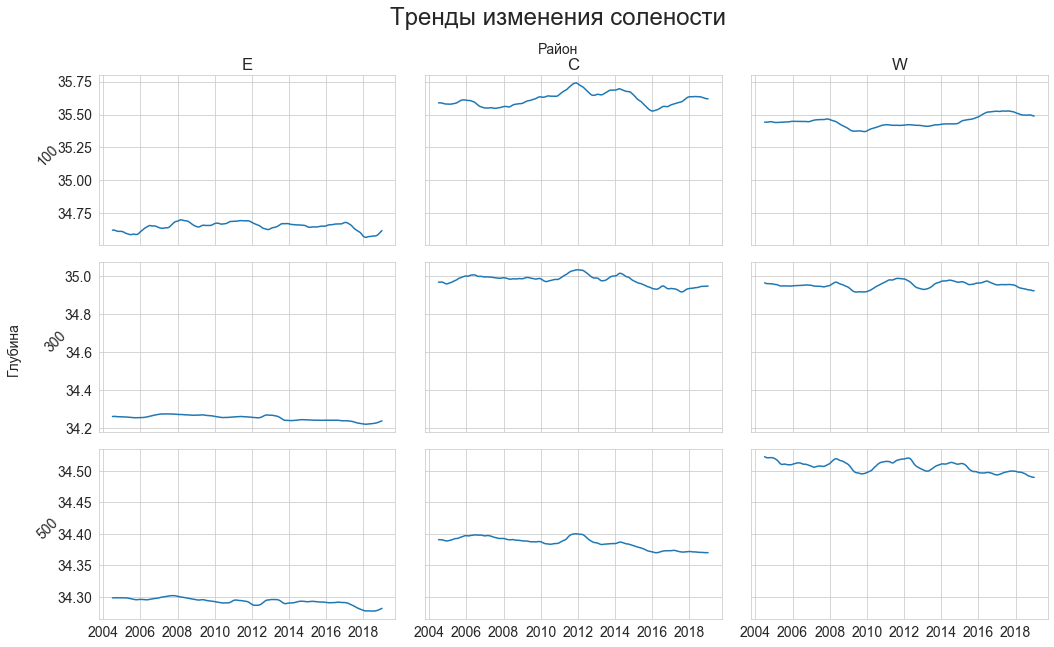

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['S{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.trend.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Тренды изменения солености', ha='center', fontsize=24)
plt.show()

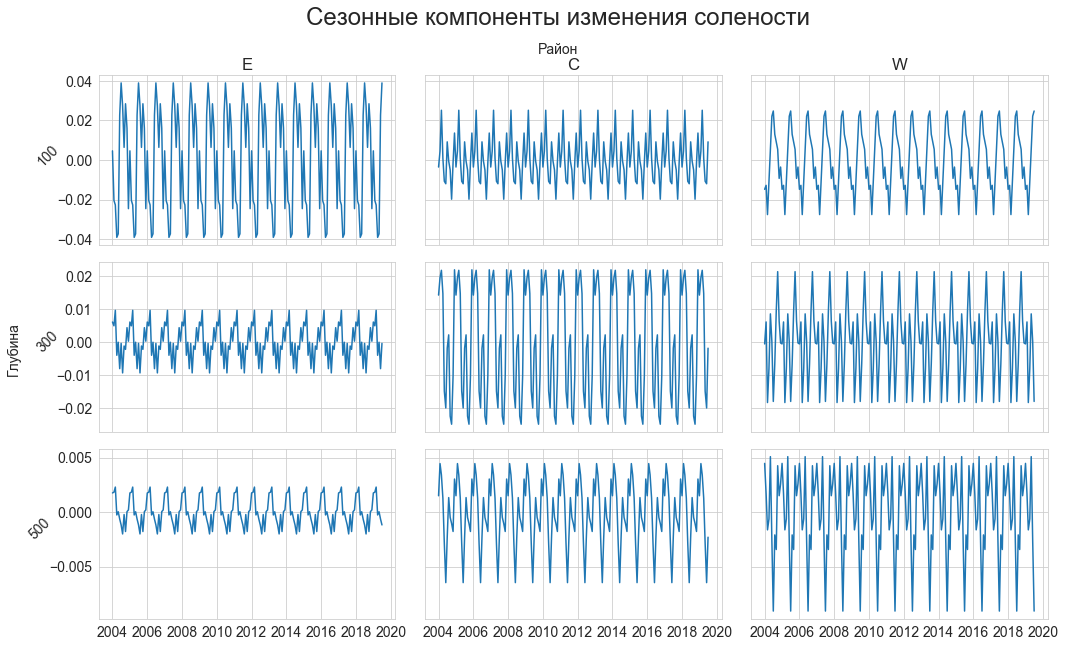

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['S{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.seasonal.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Сезонные компоненты изменения солености', ha='center', fontsize=24)
plt.show()

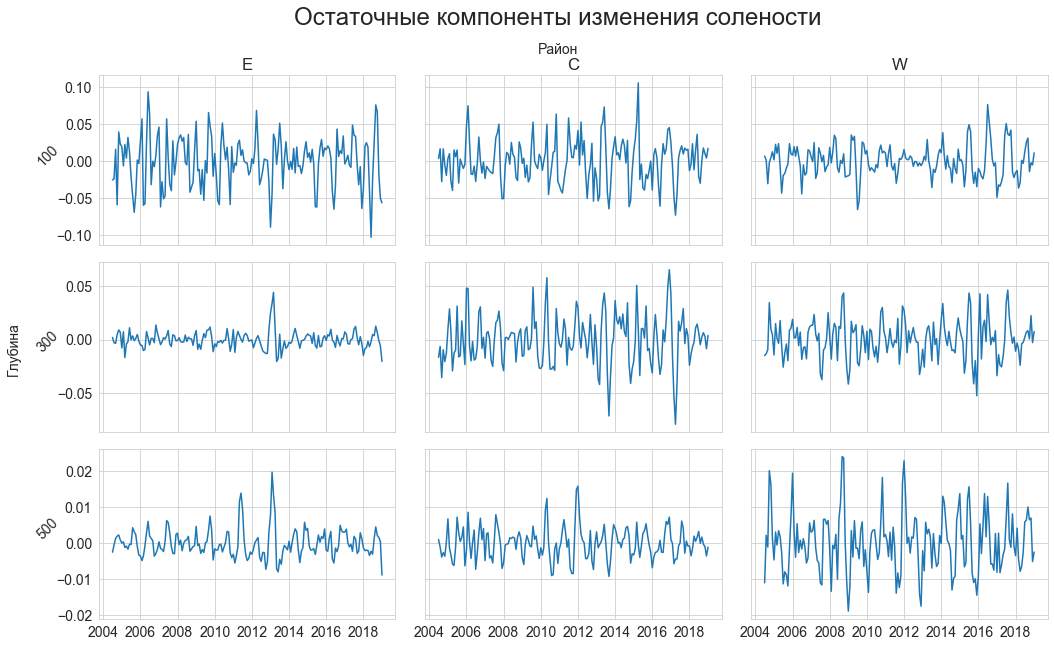

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):
        decompose = sm.tsa.seasonal_decompose(data['S{}{}'.format(depth, region)])
        ax[rowidx, colidx].plot(decompose.resid.dropna())
        ax[rowidx, colidx].label_outer()
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Остаточные компоненты изменения солености', ha='center', fontsize=24)
plt.show()

---

In [17]:
data = data.reset_index()

In [18]:
df = pd.DataFrame(columns=['val', 'depth', 'region', 'measurement', 'date'])

In [19]:
for col in data.columns[1:]:
    tmp = data[[col, 'date']].copy()
    tmp['depth'] = int(col[1:-1])
    tmp['region'] = col[-1]
    tmp['measurement'] = col[0]
    tmp['date'] = tmp['date']
    tmp['val'] = data[col]
    tmp = tmp.drop(col, axis=1)
    df = df.append(tmp)

In [20]:
df.to_csv('joint_table.csv', index=None)

In [21]:
df.columns = ['дата', 'глубина', 'тип измерения', 'регион', 'значение']

In [22]:
from scipy.stats import spearmanr

In [23]:
from dtaidistance import dtw, clustering

## Взаимосвязи между соленостью и температурой

Корреляции между соленостью и температурой воды на разных глубинах.

Корреляции вычисляются на отдельных промежутках времени методом скользящего окна с единичным шагом.

Размер окна:

In [24]:
window_size=15

#### Центральный регион

In [25]:
data.set_index('date', inplace=True)

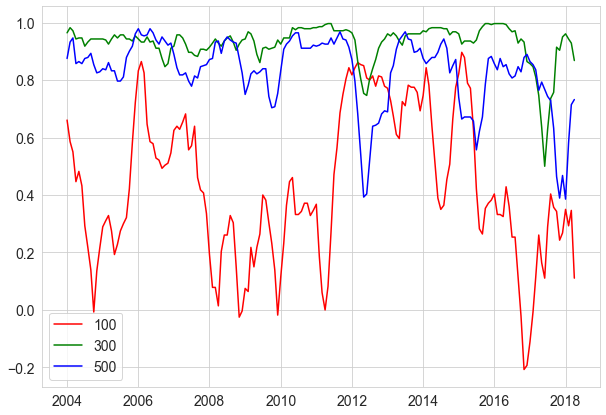

In [26]:
plt.figure(figsize=(10,7))
for c1,c2,color, label in [('T100C','S100C','r', '100'),('T300C','S300C','g','300'),('T500C','S500C','b', '500')]:
    T = []
    S = []
    for idx in range(0, len(data) -  window_size):
        T.append(data[c1][idx:idx+window_size])
        S.append(data[c2][idx:idx+window_size])
    correlations = np.array([spearmanr(t,s)[0] for t,s in zip(T,S)])
    correlations_filtered = correlations.copy()
    #correlations_filtered[correlations_filtered < 0.5] = 0
    plt.plot_date(data.index[:-window_size],correlations_filtered, 'b-', xdate=True, c=color, label=label)

plt.legend()
plt.show()

#### Восточный регион

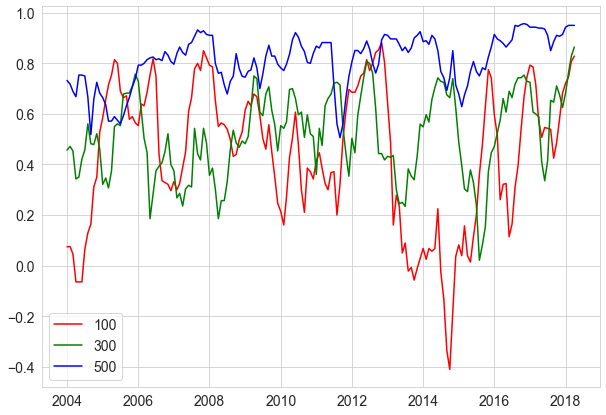

In [27]:
plt.figure(figsize=(10,7))
region = 'E'
for c1,c2,color, label in [('T100'+region,'S100'+region,'r', '100'),('T300'+region,'S300'+region,'g','300'),('T500'+region,'S500'+region,'b', '500')]:
    T = []
    S = []
    for idx in range(0, len(data) -  window_size):
        T.append(data[c1][idx:idx+window_size])
        S.append(data[c2][idx:idx+window_size])
    correlations = np.array([spearmanr(t,s)[0] for t,s in zip(T,S)])
    correlations_filtered = correlations.copy()
    #correlations_filtered[correlations_filtered < 0.5] = 0
    plt.plot_date(data.index[:-window_size],correlations_filtered, 'b-', xdate=True, c=color, label=label)
plt.legend()
plt.show()

#### Западный регион:

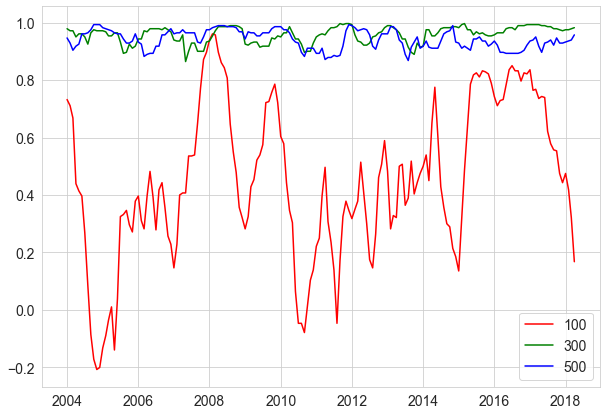

In [28]:
plt.figure(figsize=(10,7))
region = 'W'
for c1,c2,color, label in [('T100'+region,'S100'+region,'r', '100'),('T300'+region,'S300'+region,'g','300'),('T500'+region,'S500'+region,'b', '500')]:
    T = []
    S = []
    for idx in range(0, len(data) -  window_size):
        T.append(data[c1][idx:idx+window_size])
        S.append(data[c2][idx:idx+window_size])
    correlations = np.array([spearmanr(t,s)[0] for t,s in zip(T,S)])
    correlations_filtered = correlations.copy()
    #correlations_filtered[correlations_filtered < 0.5] = 0
    plt.plot_date(data.index[:-window_size],correlations_filtered, 'b-', xdate=True, c=color, label=label)
plt.legend()
plt.show()

Тут мы видим, что корреляция температуры и солености на 300 и 500 метрах ведет себя более-менее одинаково, на 100-метровой глубине влияние поверхности ещё слишком велико.


----

Любопытен восточный регион, в котором корреляции для 300 и 500 метровых глубин иногда(2006, 2013,2015-2016 годы) отличаются.

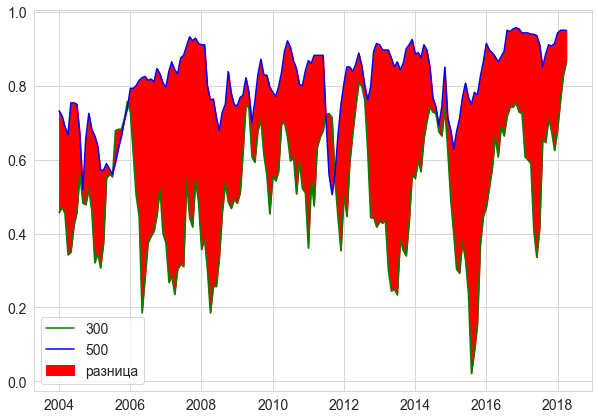

In [29]:
plt.figure(figsize=(10,7))
region = 'E'
for c1,c2,color, label in [('T300'+region,'S300'+region,'g','300'),('T500'+region,'S500'+region,'b', '500')]:
    T = []
    S = []
    for idx in range(0, len(data) -  window_size):
        T.append(data[c1][idx:idx+window_size])
        S.append(data[c2][idx:idx+window_size])
    correlations = np.array([spearmanr(t,s)[0] for t,s in zip(T,S)])
    correlations_filtered = correlations.copy()
    #correlations_filtered[correlations_filtered < 0.5] = 0
    plt.plot_date(data.index[:-window_size],correlations_filtered, 'b-', xdate=True, c=color, label=label)
    
cc = []
for c1,c2,color, label in [('T300'+region,'S300'+region,'g','300'),('T500'+region,'S500'+region,'b', '500')]:
    T = []
    S = []
    for idx in range(0, len(data) -  window_size):
        T.append(data[c1][idx:idx+window_size])
        S.append(data[c2][idx:idx+window_size])
    correlations = np.array([spearmanr(t,s)[0] for t,s in zip(T,S)])
    correlations_filtered = correlations.copy()
    #correlations_filtered[correlations_filtered < 0.5] = 0
    cc.append(correlations_filtered)

plt.fill_between(data.index[:-window_size],cc[0], cc[1],color='red', label='разница')

plt.legend()
plt.show()

-----

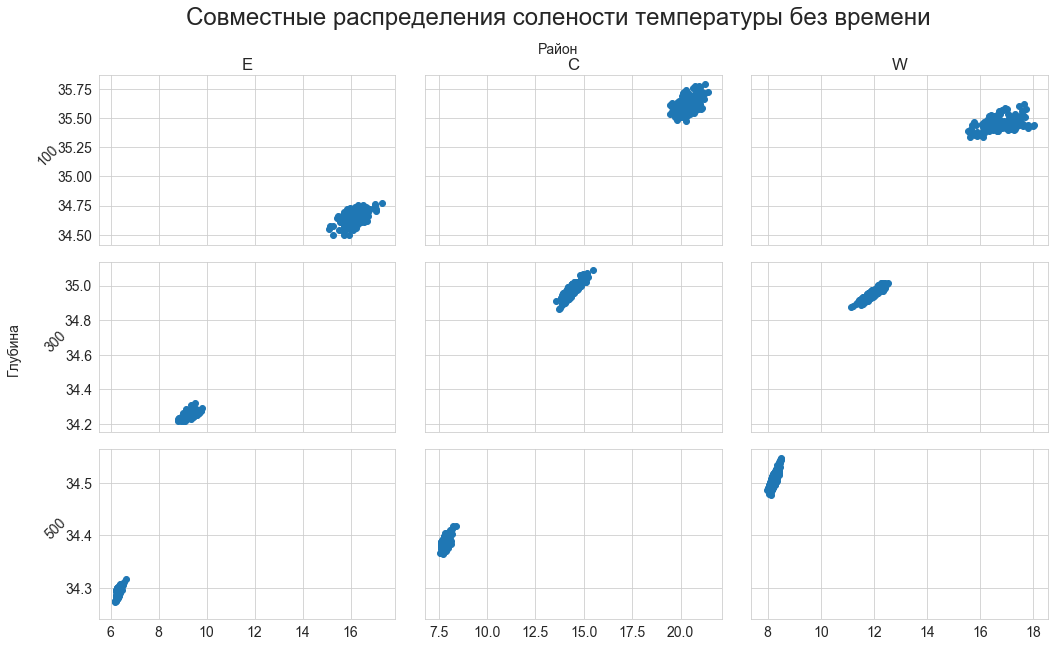

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(17,10), sharex='col', sharey='row',
                     gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
                      )

for colidx, region in enumerate(['E', 'C', 'W']):
    ax[0, colidx].set_title(region)
    for rowidx, depth in enumerate([100,300,500]):

#         sns.jointplot(data['T{}{}'.format(depth, region)],
#                       data['S{}{}'.format(depth, region)], 
#                       ax=ax[rowidx, colidx])
        ax[rowidx, colidx].scatter(data['T{}{}'.format(depth, region)],                       data['S{}{}'.format(depth, region)])    
#    data['T{}{}'.format(depth, region)]
#         decompose = sm.tsa.seasonal_decompose(data['T{}{}'.format(depth, region)])
#         ax[rowidx, colidx].plot(decompose.seasonal.dropna())
        ax[rowidx, colidx].label_outer()
        
for ax, row in zip(ax[:,0], [100,300,500]):
    ax.set_ylabel(row, rotation=45)
    
fig.text(0.05, 0.5, 'Глубина', va='center', rotation='vertical')
fig.text(0.5, 0.91, 'Район', ha='center')
fig.text(0.5, 0.95, 'Cовместные распределения солености температуры без времени', ha='center', fontsize=24)
plt.show()

Одна точка на этом графике - это параметры температуры(ось х) и солености(ось у) в определенный момент времени.